In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import numpy as np
import scipy.io
import pickle
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print('training feature\n'+str(mnist.train.images.shape)+'\ntraining label\n'+str(mnist.train.labels.shape))
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

X_train

/opt/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
training feature
(55000, 784)
training label
(55000, 10)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [2]:
print(np.shape(X_train),np.shape(Y_train))
X_train_re = np.reshape(X_train,[-1,28,28])
X_test_re = np.reshape(X_test,[-1,28,28])
print(np.shape(X_train_re),np.shape(Y_train))
print(np.shape(X_test_re),np.shape(Y_test))

(55000, 784) (55000, 10)
(55000, 28, 28) (55000, 10)
(10000, 28, 28) (10000, 10)


In [3]:
scale = 4
X_train_temp = np.zeros([np.shape(X_train_re)[0], np.shape(X_train_re)[1]*scale , np.shape(X_train_re)[2]*scale], dtype=np.float32)
X_test_temp = np.zeros([np.shape(X_test_re)[0], np.shape(X_test_re)[1]*scale , np.shape(X_test_re)[2]*scale], dtype=np.float32)

for i in range(np.shape(X_train_re)[0]):
    temp_idx_1=np.random.randint(0,(scale-1)*np.shape(X_train_re)[1])
    temp_idx_2=np.random.randint(0,(scale-1)*np.shape(X_train_re)[2])    
    X_train_temp[i, temp_idx_1:(temp_idx_1+np.shape(X_train_re)[1]), temp_idx_2:(temp_idx_2+np.shape(X_train_re)[2])] = X_train_re[i,:,:]
        
for i in range(np.shape(X_test_re)[0]):
    temp_idx_1=np.random.randint(0,(scale-1)*np.shape(X_test_re)[1])
    temp_idx_2=np.random.randint(0,(scale-1)*np.shape(X_test_re)[2])    
    X_test_temp[i, temp_idx_1:(temp_idx_1+np.shape(X_test_re)[1]), temp_idx_2:(temp_idx_2+np.shape(X_test_re)[2])] = X_test_re[i,:,:]    

print(np.shape(X_train_temp), np.shape(X_test_temp))

(55000, 112, 112) (10000, 112, 112)


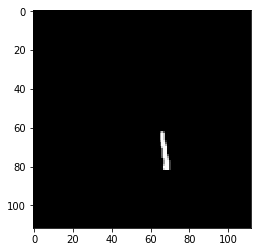

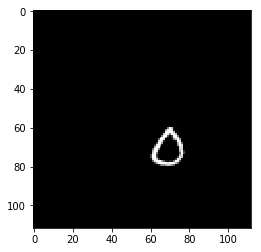

In [4]:
temp_idx1 = np.random.randint(0,np.shape(X_train_re)[0])
temp_idx2 = np.random.randint(0,np.shape(X_test_re)[0])

plt.imshow(X_train_temp[temp_idx1,:,:], cmap='gray')
plt.show()
plt.imshow(X_test_temp[temp_idx2,:,:], cmap='gray')
plt.show()

In [5]:
# scipy.io.savemat('MNIST_data_train_re.mat', {'X_train':X_train_temp, 'Y_train':Y_train})
# scipy.io.savemat('MNIST_data_test_re.mat', {'X_test':X_test_temp, 'Y_test':Y_test})

with open('MNIST_data_train_X.pkl','wb') as file:
    pickle.dump(X_train_temp,file)
with open('MNIST_data_train_Y.pkl','wb') as file:
    pickle.dump(Y_train,file)
with open('MNIST_data_test_X.pkl','wb') as file:
    pickle.dump(X_test_temp,file)
with open('MNIST_data_test_Y.pkl','wb') as file:
    pickle.dump(Y_test,file)
